<a href="https://colab.research.google.com/github/sanjanabayya30/SML_2303A52019/blob/main/P5_L5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1:

A customer service center receives calls daily, with the number of calls ranging from 0 to 7 per
day. The management wants to study the distribuƟon of daily calls.

   1.Generate a dataset represenƟng the number of calls received per day for N days.
   

   2.Compute and visualize the PMF and CDF to analyze the probability of receiving a
   specific number of calls on a given day.

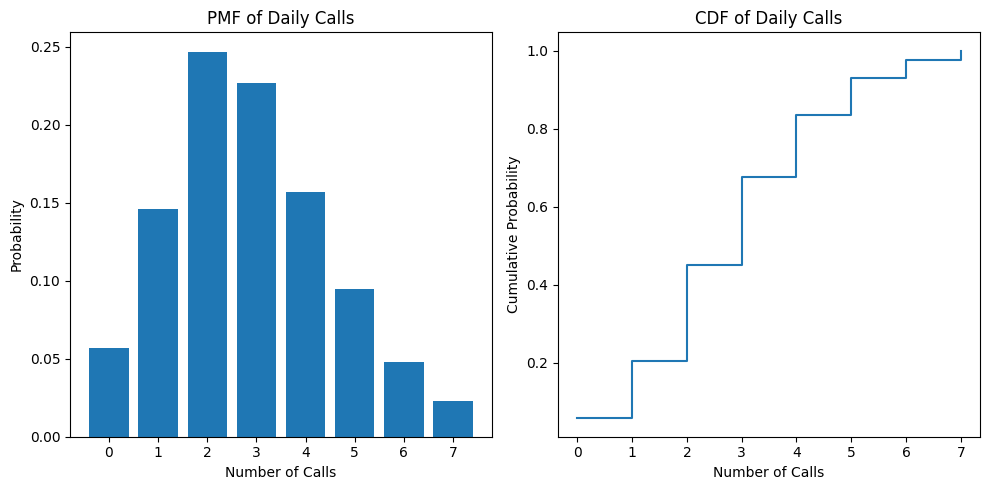

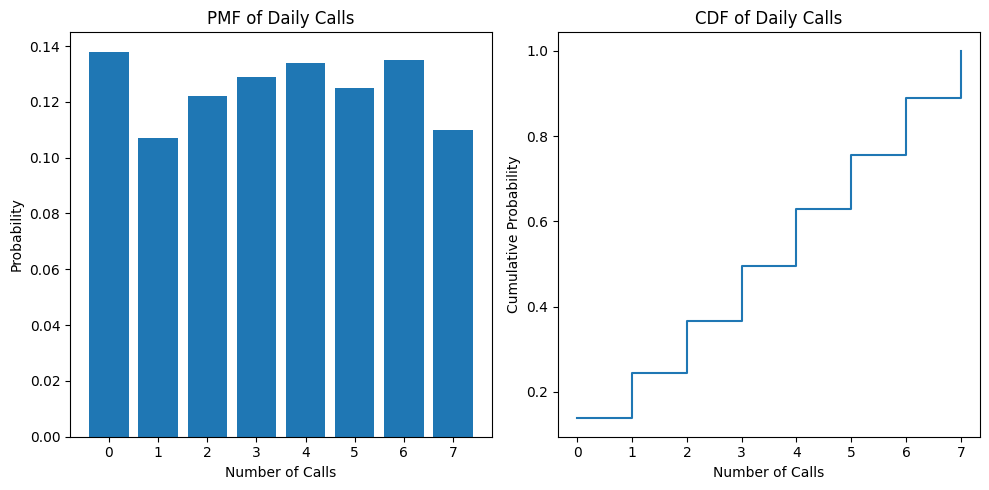

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson

# Question 1: Customer Service Calls (Different Distributions)

def analyze_calls(N, dist_type="uniform"):
    """Simulates and analyzes customer service calls with different distributions.

    Args:
        N: The number of days to simulate.
        dist_type: The type of distribution to use ("uniform", "poisson").
    """

    if dist_type == "uniform":
        calls_per_day = np.random.randint(0, 8, N)  # Uniform distribution (0 to 7)
    elif dist_type == "poisson":
         # Example Poisson with mean 3 (adjust as needed)
        calls_per_day = poisson.rvs(3, size=N)  # Poisson distribution
        calls_per_day = np.clip(calls_per_day,0,7) #clip values to 0-7 as specified
    else:
        raise ValueError("Invalid distribution type. Choose 'uniform' or 'poisson'.")

    # ... (PMF and CDF calculation and plotting remain the same as before)
    unique_calls, counts = np.unique(calls_per_day, return_counts=True)
    pmf = counts / N

    # Calculate CDF
    cdf = np.cumsum(pmf)

    # Visualize PMF and CDF
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.bar(unique_calls, pmf)
    plt.xticks(unique_calls)
    plt.xlabel("Number of Calls")
    plt.ylabel("Probability")
    plt.title("PMF of Daily Calls")

    plt.subplot(1, 2, 2)
    plt.step(unique_calls, cdf, where='post')  # Use step plot for CDF
    plt.xticks(unique_calls)
    plt.xlabel("Number of Calls")
    plt.ylabel("Cumulative Probability")
    plt.title("CDF of Daily Calls")

    plt.tight_layout()
    plt.show()

    return calls_per_day, pmf, cdf



# Example usage for Question 1 (Poisson):
N_days = 1000
calls_data_poisson, pmf_poisson, cdf_poisson = analyze_calls(N_days, dist_type="poisson")

# Example usage for Question 1 (Uniform):
calls_data_uniform, pmf_uniform, cdf_uniform = analyze_calls(N_days, dist_type="uniform")

Question 2:

A hospital receives emergency cases daily, and there is a 25% probability that a randomly
arriving paƟent requires immediate surgery. Suppose N paƟents visit the emergency
department in a day (N ≥ 100):

i) What is the probability that exactly 20 paƟents need surgery?

ii) What is the probability that at least 30 paƟents need surgery?

iii) On average, how many paƟents requiring surgery should the hospital expect?


In [ ]:
def analyze_surgery_needs(N):
    """Analyzes surgery needs with different N values."""
    p = 0.25  # Probability of needing surgery

    # ... (rest of the calculation remains the same)
    prob_exact_20 = binom.pmf(20, N, p)

    # ii) Probability of at least 30 patients needing surgery
    prob_at_least_30 = 1 - binom.cdf(29, N, p)  # Using the complement

    # iii) Expected number of patients needing surgery
    expected_surgery = N * p

    print(f"For N = {N}:")
    print(f"Probability of exactly 20 needing surgery: {prob_exact_20}")
    print(f"Probability of at least 30 needing surgery: {prob_at_least_30}")
    print(f"Expected number needing surgery: {expected_surgery}")
    print("-" * 30)
    return prob_exact_20, prob_at_least_30, expected_surgery



# Example Usage for Question 2 (Different Ns):
N_patients_list = [100, 200, 500]  # Different N values
for N in N_patients_list:
    analyze_surgery_needs(N)

For N = 100:
Probability of exactly 20 needing surgery: 0.049300640337677185
Probability of at least 30 needing surgery: 0.14954104656657363
Expected number needing surgery: 25.0
------------------------------
For N = 200:
Probability of exactly 20 needing surgery: 4.760145002605811e-08
Probability of at least 30 needing surgery: 0.9997896615831557
Expected number needing surgery: 50.0
------------------------------
For N = 500:
Probability of exactly 20 needing surgery: 2.5957444958658784e-37
Probability of at least 30 needing surgery: 1.0
Expected number needing surgery: 125.0
------------------------------
